In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
pd.options.display.float_format = "{:.2f}".format

## 1. Data Sourcing

In [2]:
# Read the application_data 
application_data = pd.read_csv('application_data.csv')
print("Application_data Shape :",application_data.shape)

Application_data Shape : (307511, 122)


In [3]:
# Print the info()
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

In [5]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

## 2. Data Cleaning

In [6]:
round(100*application_data.isnull().sum()/len(application_data.index),2).sort_values(ascending = False)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
NONLIVINGAPARTMENTS_AVG        69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MEDI          68.35
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
FLOORSMIN_MEDI                 67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_AVG                  67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_AVG                66.50
YEARS_BUILD_MODE               66.50
OWN_CAR_AGE                    65.99
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
LANDAREA_MEDI                  59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MEDI             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MODE             55.18
E

In [7]:
# Remove columns with null percentage greater than 40
application_data = application_data.loc[:, round(100*application_data.isnull().sum()/len(application_data.index),2) < 40 ]

In [8]:
round(100*application_data.isnull().sum()/len(application_data.index),2).sort_values(ascending = False)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_MOBIL                     0.00
FLAG_WORK_PHONE                0.00
FLAG_EMP_PHONE                 0.00
DAYS_REGISTRATION              0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS                0.00
DAYS_ID_PUBLISH                0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_EMPLOYED                  0.00
AMT_INCOME_TOTAL               0.00
TARGET                      

In [9]:
print(application_data.shape)

(307511, 73)


In [10]:
# handling columns with low_null percentage < 13% 

low_na_col = application_data.loc[:, (round(100*application_data.isnull().sum()/len(application_data.index),2) > 0) & 
                                 (round(100*application_data.isnull().sum()/len(application_data.index),2) <= 15)]

low_na_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_GOODS_PRICE             307233 non-null  float64
 1   NAME_TYPE_SUITE             306219 non-null  object 
 2   EXT_SOURCE_2                306851 non-null  float64
 3   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 4   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 5   OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 6   DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 8   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 9   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 10  AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 11  AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(12)

**Approach to null values**

**Object type column's :**

There is only object type column `NAME_TYPE_SUITE` which is a categorical data. Hence it is better to impute it with `mode()` of the column

**numeric column's :**

In [11]:
# Describe the numeric type column
low_na_col.describe([.25,.5,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
AMT_GOODS_PRICE,307233.00,538396.21,369446.46,40500.00,238500.00,450000.00,679500.00,1305000.00,1800000.00,4050000.00
EXT_SOURCE_2,306851.00,0.51,0.19,0.00,0.39,0.57,0.66,0.75,0.78,0.85
OBS_30_CNT_SOCIAL_CIRCLE,306490.00,1.42,2.40,0.00,0.00,0.00,2.00,6.00,10.00,348.00
DEF_30_CNT_SOCIAL_CIRCLE,306490.00,0.14,0.45,0.00,0.00,0.00,0.00,1.00,2.00,34.00
OBS_60_CNT_SOCIAL_CIRCLE,306490.00,1.41,2.38,0.00,0.00,0.00,2.00,6.00,10.00,344.00
DEF_60_CNT_SOCIAL_CIRCLE,306490.00,0.10,0.36,0.00,0.00,0.00,0.00,1.00,2.00,24.00
AMT_REQ_CREDIT_BUREAU_HOUR,265992.00,0.01,0.08,0.00,0.00,0.00,0.00,0.00,0.00,4.00
AMT_REQ_CREDIT_BUREAU_DAY,265992.00,0.01,0.11,0.00,0.00,0.00,0.00,0.00,0.00,9.00
AMT_REQ_CREDIT_BUREAU_WEEK,265992.00,0.03,0.20,0.00,0.00,0.00,0.00,0.00,1.00,8.00
AMT_REQ_CREDIT_BUREAU_MON,265992.00,0.27,0.92,0.00,0.00,0.00,0.00,1.00,4.00,27.00


Columns such as `AMT_GOODS_PRICE`, `OBS_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `AMT_REQ_CREDIT_BUREAU_QRT` has a huge difference between the max value and 99% data, hence they are considered as outliers and it is better to impute these values with `median()` 

columns such as `EXT_SOURCE_2` can be imputed with `mean()`


### 2.1  Datatype Checking

In [12]:
# Dropping the columns which are not required for analysis 
col_list = [  'EXT_SOURCE_3','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',  'FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
              'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 
              'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
              'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_DAY',
              'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

application_data.drop(col_list, axis=1, inplace=True)

In [13]:
# Checking the datatype of columns
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [14]:
# `TARGET` should be a categorical column but it is stored as integer 
# application_data['TARGET'] = pd.Categorical(application_data['TARGET'], ordered=True) 

#There are some negative values in Days columns, convert it into integer hence it can be represented as years
application_data['AGE']                = abs(application_data['DAYS_BIRTH']/365).astype(int)

application_data['YEARS_EMPLOYED']     = abs(application_data['DAYS_EMPLOYED']/365).astype(int)

application_data['YEARS_ID_PUBLISH']   = abs(application_data['DAYS_ID_PUBLISH']/365).astype(int) 

application_data['YEARS_REGISTRATION'] = abs(application_data['DAYS_REGISTRATION']/365).astype(int)

# Dropping the original columns
application_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],axis=1,inplace=True)

In [15]:
# Checking the datatype of columns
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### 2.2  Handling Outliers

In [16]:
# Describe the application_data 
application_data.describe([.75,.95,.99]).T

,count,mean,std,min,50%,75%,95%,99%,max
SK_ID_CURR,307511.00,278180.52,102790.18,100002.00,278202.00,367142.50,438427.50,452712.90,456255.00
TARGET,307511.00,0.08,0.27,0.00,0.00,0.00,1.00,1.00,1.00
CNT_CHILDREN,307511.00,0.42,0.72,0.00,0.00,1.00,2.00,3.00,19.00
AMT_INCOME_TOTAL,307511.00,168797.92,237123.15,25650.00,147150.00,202500.00,337500.00,472500.00,117000000.00
AMT_CREDIT,307511.00,599026.00,402490.78,45000.00,513531.00,808650.00,1350000.00,1854000.00,4050000.00
AMT_ANNUITY,307499.00,27108.57,14493.74,1615.50,24903.00,34596.00,53325.00,70006.50,258025.50
AMT_GOODS_PRICE,307233.00,538396.21,369446.46,40500.00,450000.00,679500.00,1305000.00,1800000.00,4050000.00
REGION_POPULATION_RELATIVE,307511.00,0.02,0.01,0.00,0.02,0.03,0.05,0.07,0.07
CNT_FAM_MEMBERS,307509.00,2.15,0.91,1.00,2.00,3.00,4.00,5.00,20.00
REGION_RATING_CLIENT,307511.00,2.05,0.51,1.00,2.00,2.00,3.00,3.00,3.00


As seen, columns which has outliers are `CNT_CHILDREN`,`AMT_INCOME_TOTAL`,`AMT_ANNUITY`,`AMT_CREDIT`,`AMT_GOODS_PRICE`,`YEARS_EMPLOYED, 'CNT_FAMILY_MEMBES` is not considered as an outlier, since it is possible that a family can have a count of 20 members in it

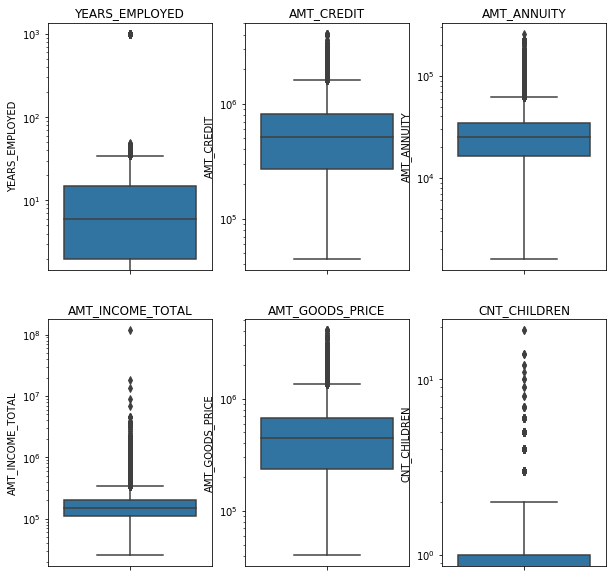

In [17]:
# define a function to make a boxplot
def udf_boxplot(*args, df):
    # to determine how many subplots should be drawn
    m = math.ceil(len(args)/3)
    
    # Plotting subplot
    fig, axes = plt.subplots(m,3,figsize=(10, 5*m))
    ax_li     = [item for sublist in axes for item in sublist]
    for col in args:
        ax_list = ax_li.pop()
        sns.boxplot(y=df[col], ax= ax_list)
        ax_list.set_title(col)
        ax_list.set_yscale('log')

numeric_outliers = ['CNT_CHILDREN', 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT', 'YEARS_EMPLOYED']

udf_boxplot(*numeric_outliers, df=application_data)

#### Treating Outliers - Observation

**YEARS_EMPLOYED** 
    
    As observed, `YEARS_EMPLOYED` has a maximum value os 1000, which is practically not possible, since average lifespan of human is 70-80 years. Hence this is considered to be an outlier because of human error. The best way to handle this is to remove the rows which has 1000 in it 

**AMT_CREDIT** 
    
    `AMT_CREDIT`  has max value lies far away from 99% percentile, hence it is also an outlier. The best way is to remove the outlier
    The same case goes for columns such as `AMT_ANNUITY`,`AMT_INCOME_TOTAL`,`AMT_GOODS_PRICE`

**CNT_CHILDREN** 
    
    `CNT_CHILDREN`  has max value i.e 19. It is practically not possible to have 19 children for 1 person. Hence it might also be a numerical error 

### 2.3 Binning Variables

In [18]:
#binning the age column as below:
# age from 0-30 -  '0-30'
# age from 30-40 - '30-40'
# age from 40-50 - '40-50'
# age from 50-60 - '50-60'
# above 60       - '60+
application_data['AGE_BIN']    = pd.cut(x=application_data['AGE'], bins=[0,30,40,50,60,100], labels = ['0-30','30-40','40-50','50-60', '60+'])
# Binning income of a person 
#0-1lakh for income between 0 and 100000
#1-2lakh for income between 100000 and 200000
#2-3lakh for income between 200000 and 300000
#3-4lakh for income between 300000 and 400000
#4lakh and above for income between 400000 

application_data['INCOME_BIN'] = pd.cut(x=application_data['AMT_INCOME_TOTAL'], bins=[0,100000,200000,300000,400000,200000000], labels=['<1lakh','1-2lakhs','2-3lakhs','3-4lakhs','4lakhs and above'])
# Binning credit/Loan amount of a person 
#C1 for income between 0 and 250000
#C2 for income between 25000 and 500000
#C3 for income between 500000 and 750000
#C4 for income between 750000 and 1000000
#C5 for income between 1000000 and 1500000 

application_data['CREDIT_BIN'] = pd.cut(x=application_data['AMT_CREDIT'], bins=[0,250000,500000,750000,1000000,1500000], labels=['<2.5lakhs','2.5-5lakhs','5-7.5laks','7.5-10lakhs','above 10 lakhs'])

In [19]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_REGISTRATION,AGE_BIN,INCOME_BIN,CREDIT_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,Laborers,1.00,2,2,Business Entity Type 3,0.26,25,1,5,9,0-30,2-3lakhs,2.5-5lakhs
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2.00,1,1,School,0.62,45,3,0,3,40-50,2-3lakhs,above 10 lakhs
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,Laborers,1.00,2,2,Government,0.56,52,0,6,11,50-60,<1lakh,<2.5lakhs
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,Laborers,2.00,2,2,Business Entity Type 3,0.65,52,8,6,26,50-60,1-2lakhs,2.5-5lakhs
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,Core staff,1.00,2,2,Religion,0.32,54,8,9,11,50-60,1-2lakhs,5-7.5laks


## 3. Analysis

### 3.1  Imbalance Percentage

Imbalance Ratio -  91.93 : 8.07


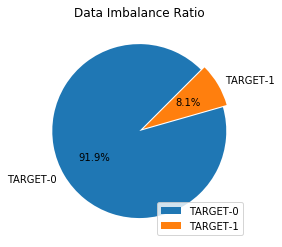

In [20]:
# Divide the dataframe into two based on the target
target_0 = application_data.loc[application_data['TARGET']==0]
target_1 = application_data.loc[application_data['TARGET']==1]

# Ratio of Percentage for target 0 and target 1
target_0_per = round(100*len(target_0)/len(application_data),2)
target_1_per = round(100*len(target_1)/len(application_data),2)

print("Imbalance Ratio - ", target_0_per ,":",target_1_per)
fig = plt.subplots(figsize=(8,4))
plt.pie([target_0_per, target_1_per], labels=['TARGET-0', 'TARGET-1'], explode=(0,0.05),autopct ='%.1f%%', startangle= 45)
plt.title('Data Imbalance Ratio')
plt.legend(['TARGET-0', 'TARGET-1'],loc= 'lower right')
plt.show()




    As seen, data has lot of imbalance with ratio as 91 : 8. After this, Univariate and Bivariate Analysis should be performed to understand the data better. Target 0 and Target1 dataframe has the same columns as of application_data. Hence check this dataframe to choose categorical columns to perform Univariate Analysis

In [21]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

### 3.2 Univariate Analysis - Categorical columns

    Univariate Analysis can be performed for target 1(Defaulter) and taget 0(Non-Defaulter) dataset for categotical and continous data. To perform univariate analysis on categorical data, following columns are considered: 

    Note: Using two columns here, so that two graphs can be displayed side by side

In [22]:
def udf_category_univariate(col1, col2):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.countplot(x=application_data[col1], hue= 'TARGET', data=application_data,order=application_data[col1].value_counts(ascending=False).index,palette='YlGnBu')
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    sns.countplot(x=application_data[col2], hue= 'TARGET', data=application_data,order=application_data[col2].value_counts(ascending=False).index,palette='YlGnBu')
    plt.xticks(rotation=45)

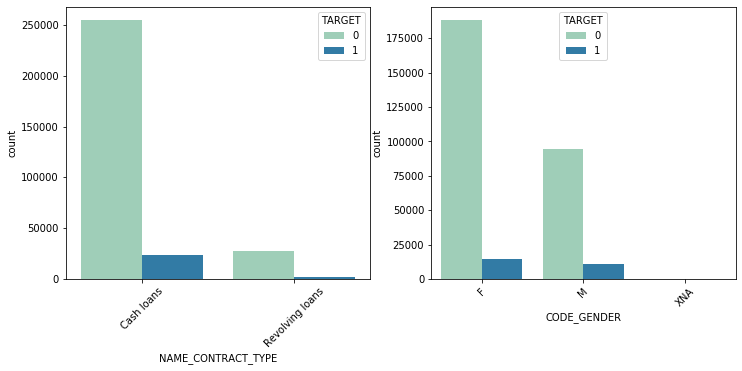

In [23]:
udf_category_univariate('NAME_CONTRACT_TYPE', 'CODE_GENDER')

### Observations

**NAME_CONRACT_TYPE :** 

    Even though there is significance amount of people who has defaulted in revolving loans, Cash loans tend to see more defaults. 

**CODE_GENDER :** 

    In either of cases(Defaulter or non-defaulter), number of female applicants is relatively high.Number of male applicants who were defaulted not as high as female applicants

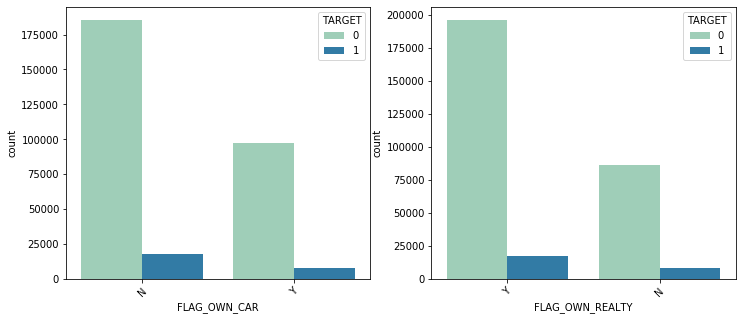

In [24]:
udf_category_univariate('FLAG_OWN_CAR', 'FLAG_OWN_REALTY')

### Observations

**FLAG_OWN_CAR :** 

    Number of people who owns a car and defaulted is half way less than number of people who don't own a car and defaulted. This may be because, people who don't own a car might be the people who can't offord a car and comes under low income category. Hence they might find it difficult to repay the loan

**FLAG_OWN_REALTY :**

    Among the applicants(defauler or non-defaulter), number of people who has own realty is 50% or more than the number of people who don't own a realty. As seen, people with own realty tend to default more.

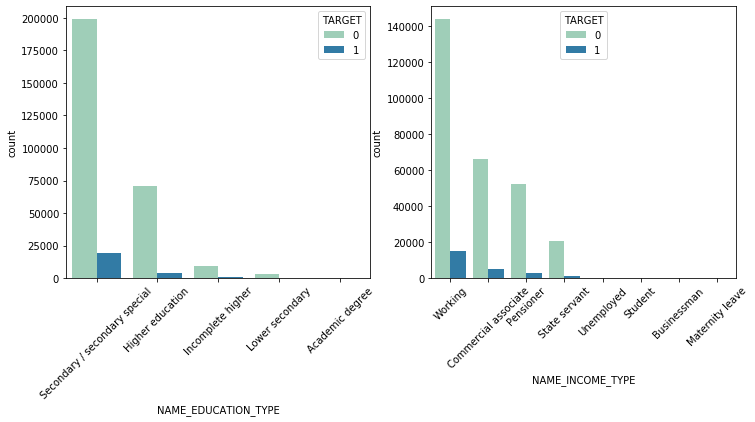

In [25]:
udf_category_univariate('NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE')

**NAME_EDUCATION_TYPE :** 
        
     It is clear that people with Secondary/secondary special are most applicants.People with Academic degree are not defaulters and there are less no of applicants also. So,bank can concentrate on the people with Academic degree.

**NAME_INCOME_TYPE :**
        
    Most of the applicants are working professionals. They tend to default more even though there are more number of people who repay their loan on time

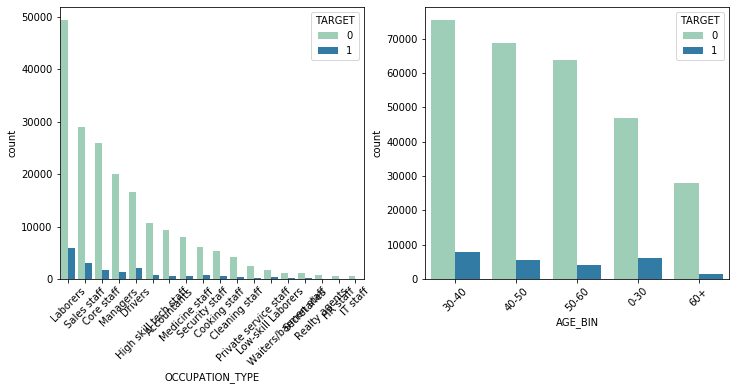

In [26]:
udf_category_univariate('OCCUPATION_TYPE', 'AGE_BIN')

**OCCUPATION_TYPE :** 
    
    Most of the applicants are Laborers, and they tend to default more even though there are large number of people who repay the loan. Since they have to uplift themselves, they apply for loan 

**AGE BIN :** 

    Applicants of age <30 or 30-40 tend to default more. This is because, these are the family people who might not have a stable income and tend to default. If their income is high, they are likely to repay on time

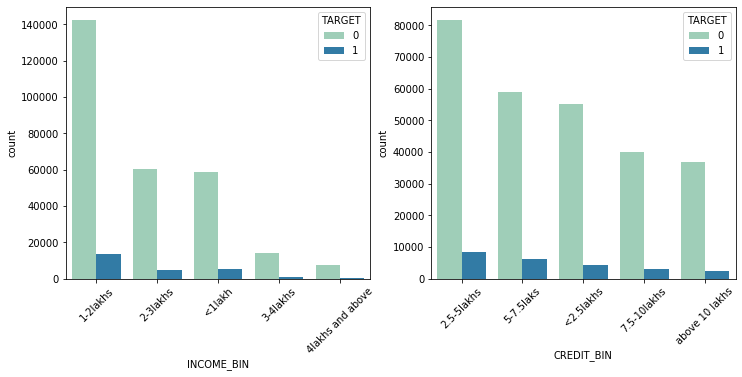

In [27]:
udf_category_univariate('INCOME_BIN', 'CREDIT_BIN')

**INCOME_BIN :** 
        
     Most of the aplicants are the people who gets less than 2 lakh income. They might in need of money since their income is less and to uplift themselves.They tend to defual more as well. 

**CREDIT_BIN :** 

    People who gets loan amount lesser are tend to default more. Since the loan amount is based on their income and they will not be able to repay well. Bank can concentrate on the people with average income and average loan amount.

### 3.3  Finding Correlation for numerical columns

In [28]:
# Fetch the numeric columns 
num_cols= list(application_data.select_dtypes(include=['int64', 'float64']))
num_cols.remove('SK_ID_CURR')
num_cols.remove('TARGET')

In [29]:
def udf_corr_matrix(df, num_cols):
    corr = df[num_cols].corr()
    corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    corr_df = corr.unstack().reset_index() 
    
    corr_df.columns = ['VAR1','VAR2', 'Correlation']
    
    corr_df.dropna(subset=['Correlation'], inplace=True)
    
    corr_df['Correlation'] = corr_df['Correlation'].abs()
    
    result = corr_df.sort_values(by='Correlation', ascending=False).reset_index().head(10)
    
    result = result.drop(columns = ['index'])
    return result

In [30]:
# Find 10 most correlated columns for Traget0
target0_corr = udf_corr_matrix(target_0, num_cols)
target0_corr

,VAR1,VAR2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
3,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
4,AMT_ANNUITY,AMT_CREDIT,0.77
5,YEARS_EMPLOYED,AGE,0.63
6,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.54
7,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.54
8,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
9,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35


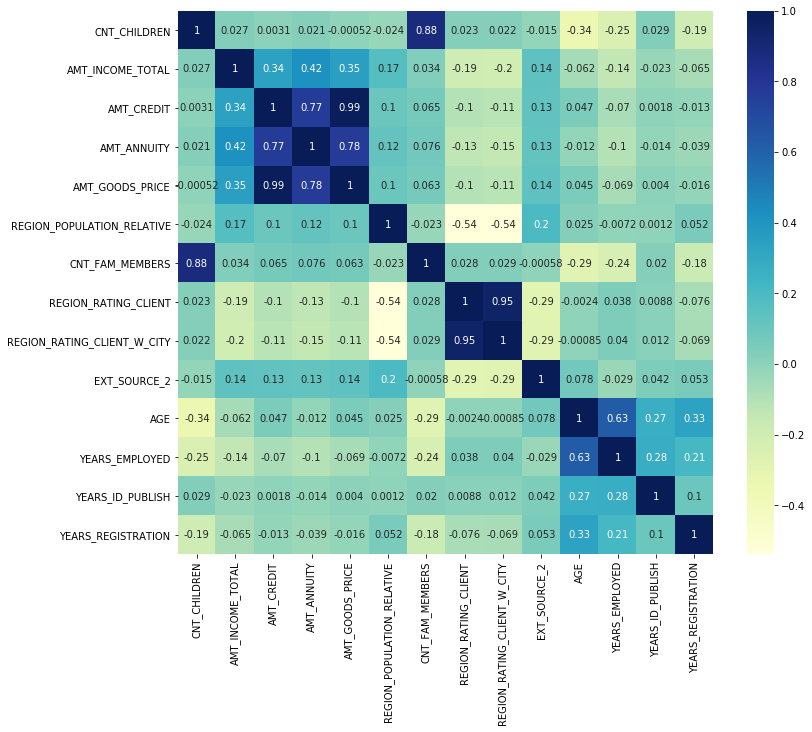

In [31]:
# Heat Map for target0
corr0 = target_0[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr0,cmap ='YlGnBu',annot=True)
plt.show()

In [32]:
#Find most correlated volumns for Target1
target0_corr = udf_corr_matrix(target_1, num_cols)
target0_corr

,VAR1,VAR2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
3,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
4,AMT_ANNUITY,AMT_CREDIT,0.75
5,YEARS_EMPLOYED,AGE,0.58
6,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.45
7,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.44
8,YEARS_REGISTRATION,AGE,0.29
9,AGE,CNT_CHILDREN,0.26


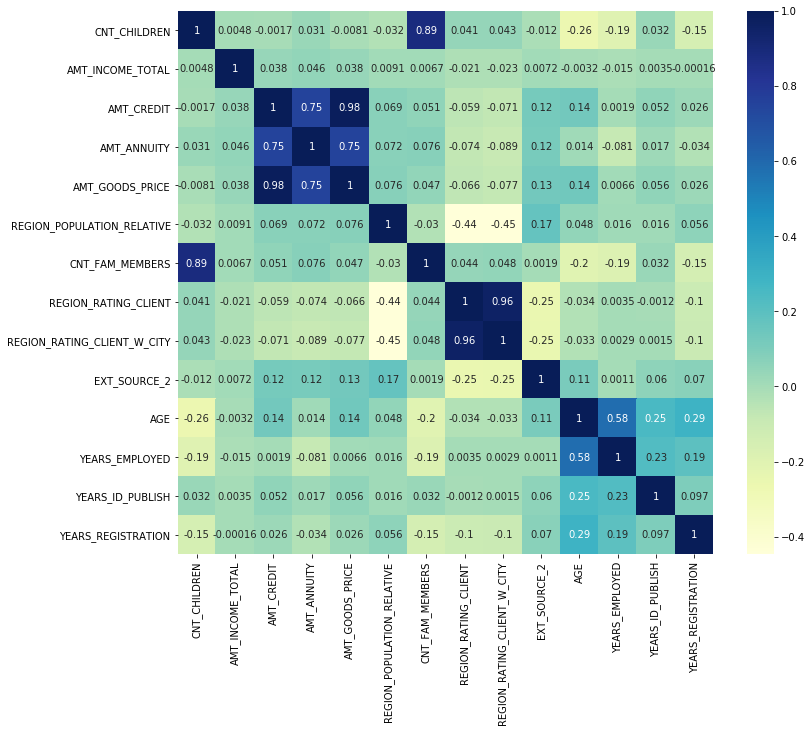

In [33]:
# Heat Map representation of Target1
corr1 = target_1[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr1,cmap ='YlGnBu',annot=True)
plt.show()

**Variables with higher Correlation for target0 and target1 :**

80% of variables are same for target0 and target1 with higher correlation. They are as follows :  
    `AMT_GOODS_PRICE	               -            AMT_CREDIT  `  
    `REGION_RATING_CLIENT_W_CITY	   -            REGION_RATING_CLIENT `   
    `CNT_FAM_MEMBERS	               -            CNT_CHILDREN  `  
    `AMT_GOODS_PRICE	               -            AMT_ANNUITY  `  
    `AMT_ANNUITY	                   -            AMT_CREDIT `   
    `YEARS_EMPLOYED	                -            AGE  `  
    `REGION_RATING_CLIENT              -            REGION_POPULATION_RELATIVE  `  
    `REGION_RATING_CLIENT_W_CITY       -       	 REGION_POPULATION_RELATIVE  `  


### 3.4 Univariate Analysis - Continous column

In [34]:
# Define a function to perform univariate analysis on continuos columns
# Plotting two columns at a time
def udf_continous_univariate(col1, col2):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(target_0[col1],label='target-0',hist=False)
    sns.distplot(target_1[col1],label='target-1', hist=False)
    plt.yscale('log')
    plt.title(col1)
    plt.subplot(1,2,2)
    sns.distplot(target_0[col2],label='target-0',hist=False)
    sns.distplot(target_1[col2],label='target-1', hist=False)
    plt.yscale('log')
    plt.title(col2)

**Considering the following columns to perform univariate continuos analysis**

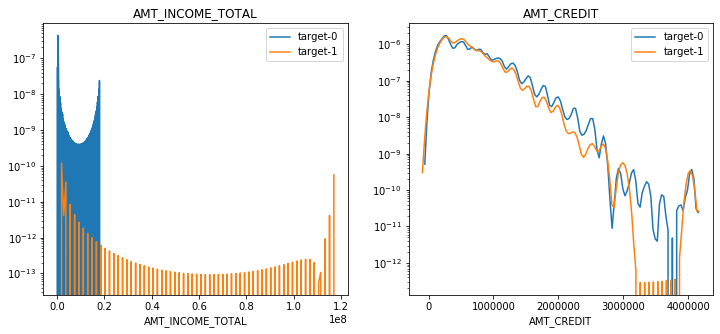

In [35]:
# AMT_GOODS_PRICE, AMT_CREDIT
udf_continous_univariate('AMT_INCOME_TOTAL', 'AMT_CREDIT')

**Observation :** 
    
    Applicants who has defaulted more belongs to category of loan amount from3-4 lakhs. Also, people with lower income i.e less than 2 lakhs tend to be the people who is having payment difficulties

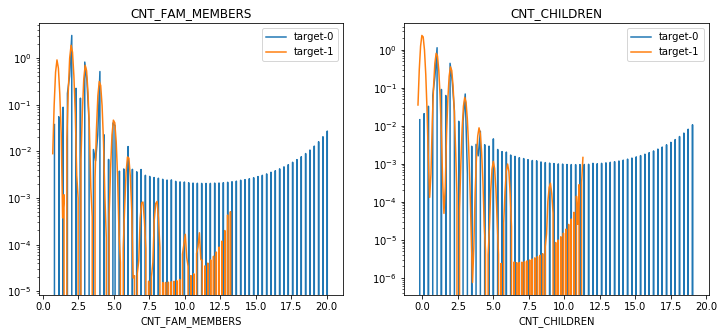

In [36]:
udf_continous_univariate('CNT_FAM_MEMBERS', 'CNT_CHILDREN')

**Observation :**

    In General, looking at both the plots, it is clear that applicants who has more than 5 children or who has more than 7 family members tend to find difficulties in repaying the loan. The reason may be due to the family commitments growing when the family size increaes, that is leading to more defaults

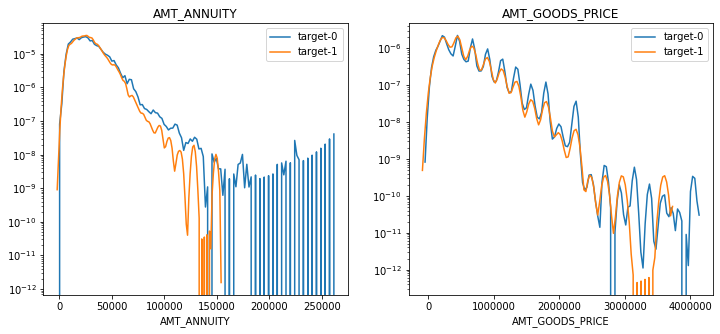

In [37]:
udf_continous_univariate('AMT_ANNUITY', 'AMT_GOODS_PRICE')

**Observation :**  

    Applicants with the annuity amount ranging from 10-15 lakhs tends to have more defaults.Amount_goods_price is same as the amount_credits in which, applicants with amount from 3-4 lakhs tends to have more defaults

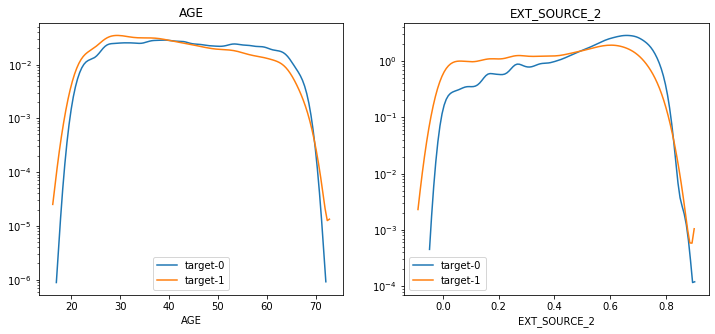

In [38]:
udf_continous_univariate('AGE', 'EXT_SOURCE_2')

### 3.5 Bi-variate Analysis 

**Categorical - Continuos :**

In [39]:
application_data['TARGET'].value_counts(normalize=True)

0   0.92
1   0.08
Name: TARGET, dtype: float64

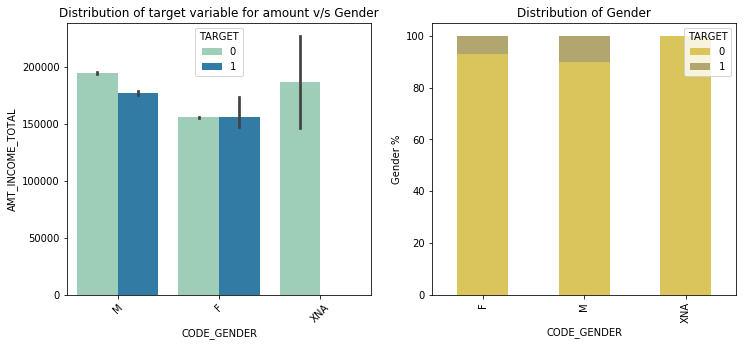

In [40]:
#Check effect of Gender and Income on Target variable based on complete data set
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x= 'CODE_GENDER', y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data =application_data,palette='YlGnBu')
plt.title('Distribution of target variable for amount v/s Gender')
plt.xticks(rotation=45)

ax=plt.subplot(1,2,2)
# Plotting the percentage columns
pal = sns.color_palette("cividis_r")

pd.crosstab(application_data['CODE_GENDER'],
            application_data['TARGET']).apply(lambda r: r*100/r.sum(), axis=1).plot.bar(stacked=True, ax=ax, color=pal)
plt.title('Distribution of Gender')
plt.ylabel('Gender %')
plt.show()


**Inferences :** 

    Male applicants with annual income less than 2 lakhs tend to be more defaulters. In the Distribution of Gender graph it is shown that, among the total male applicants male tend to have more defults. It's better to concentarte more on the female candidates

#### INCOME VS CREDIT - DEFAULT's

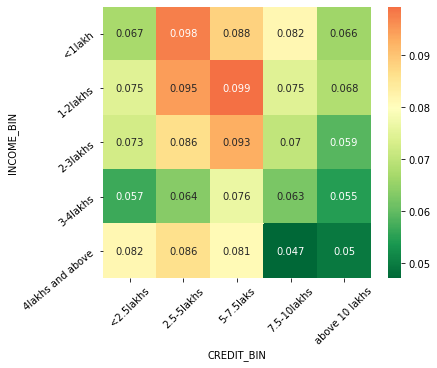

In [41]:
# Check for any relation between Income and credit  for target 1 (Considering 1 
# since we are looking for defaults analysis)
plt.figure(figsize=(6,5))
default = pd.pivot_table(data=application_data, index= 'INCOME_BIN', columns='CREDIT_BIN', values='TARGET')

sns.heatmap(default, annot=True, cmap='RdYlGn_r', center=0.08)
plt.xticks(rotation=45)
plt.yticks(rotation=40)
plt.show()

**Observation :** 
   
    Among the people who has defaulted in the range of income less than 2 lakhs but their credit is more than 5 lakhs. When income is low than the amount of credit, then they are not able to pay back

#### EDUCATIO vs INCOME - DEFAULT's

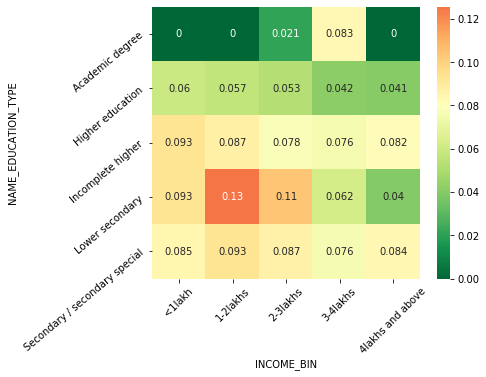

In [42]:
# Check for any relation between Income and credit  for target 1 (Considering 1 
# since we are looking for defaults analysis)
plt.figure(figsize=(6,5))
default = pd.pivot_table(data=application_data, index= 'NAME_EDUCATION_TYPE', columns='INCOME_BIN', values='TARGET')

sns.heatmap(default, annot=True, cmap='RdYlGn_r', center=0.08)
plt.xticks(rotation=45)
plt.yticks(rotation=40)
plt.show()

**Observations :** 
    
    Applicants with education type `Lower Secondary` and income less than 2 lakhs are the pople who has not able to pay back and chosen to default

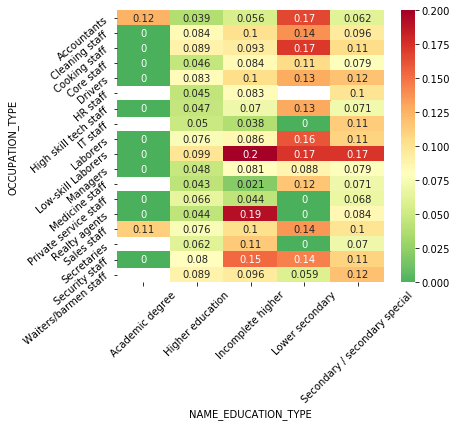

In [43]:
# Check for any relation between Income and credit  for target 1 (Considering 1 
# since we are looking for defaults analysis)
plt.figure(figsize=(6,5))
default = pd.pivot_table(data=application_data, index= 'OCCUPATION_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET')

sns.heatmap(default, annot=True, cmap='RdYlGn_r', center=0.08)
plt.xticks(rotation=45)
plt.yticks(rotation=40)
plt.show()

**Observations :** 
    
    Applicants who are Low-skill labourers with education either `Incomplete higher` or `Lower secondary` higher defaulters.This may be due to their income level low and they are not able to repay on time

### Final Inferences :

    Variables that needs to be taken into account during credit application processing of a client are:
            1. Here, we can observe that a high number of defaulters belonging to income group less than 2 lakhs ask for a smaller loan amount. Hence, we can say that , lower the income, higher the chances of applying for a loan. 

           2. We can observe that applicants with education type `Lower Secondary` and income bin less than 2 lakhs are the pople who has not able to pay back and chosen to default

           3. Applicants who has more than 5 children or who has more than 7 family members tend to find difficulties in repaying the loan. The reason may be due to the family commitments growing when the family size increaes, that is leading to more defaults
           4.  Applicants who are Low-skill labourers with education either `Incomplete higher` or `Lower secondary` higher defaulters.This may be due to their income level low and they are not able to repay on time
           5.  Male applicants with annual income less than 2 lakhs tend to be more defaulters. Among the total  applicants male applicant tend to have more defults. It's better to concentarte more on the female candidates

    Thus for a client's behavioral charecteristics, the variables that are of utmost importance for a loan application are:
        AMT_INCOME_TOTAL
        AMT_CREDIT
        CNT_FAMILY, CNT_FAM_MEMBERS
        AGE_CLIENT
        CODE_GENDER

## Previous application data

### 1. Data Sourcing

In [44]:
# Read the application_data 
prev_app_data = pd.read_csv('previous_application.csv')
print("Previous application Shape :",prev_app_data.shape)

Previous application Shape : (1670214, 37)


In [45]:
prev_app_data.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


### 2. Merging both the data frames

In [46]:
master_df = pd.merge(application_data, prev_app_data, how='left', on='SK_ID_CURR')
master_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AGE,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_REGISTRATION,AGE_BIN,INCOME_BIN,CREDIT_BIN,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,Laborers,1.00,2,2,Business Entity Type 3,0.26,25,1,5,9,0-30,2-3lakhs,2.5-5lakhs,1038818.00,Consumer loans,9251.77,179055.00,179055.00,0.00,179055.00,SATURDAY,9.00,Y,1.00,0.00,nan,nan,XAP,Approved,-606.00,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.00,Auto technology,24.00,low_normal,POS other with interest,365243.00,-565.00,125.00,-25.00,-17.00,0.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2.00,1,1,School,0.62,45,3,0,3,40-50,2-3lakhs,above 10 lakhs,1810518.00,Cash loans,98356.99,900000.00,1035882.00,nan,900000.00,FRIDAY,12.00,Y,1.00,nan,nan,nan,XNA,Approved,-746.00,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.00,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,-716.00,-386.00,-536.00,-527.00,1.00
2,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2.00,1,1,School,0.62,45,3,0,3,40-50,2-3lakhs,above 10 lakhs,2636178.00,Consumer loans,64567.67,337500.00,348637.50,0.00,337500.00,SUNDAY,17.00,Y,1.00,0.00,nan,nan,XAP,Approved,-828.00,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.00,Furniture,6.00,middle,POS industry with interest,365243.00,-797.00,-647.00,-647.00,-639.00,0.00
3,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,Core staff,2.00,1,1,School,0.62,45,3,0,3,40-50,2-3lakhs,above 10 lakhs,2396755.00,Consumer loans,6737.31,68809.50,68053.50,6885.00,68809.50,SATURDAY,15.00,Y,1.00,0.10,nan,nan,XAP,Approved,-2341.00,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.00,Consumer electronics,12.00,middle,POS household with interest,365243.00,-2310.00,-1980.00,-1980.00,-1976.00,1.00
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,Laborers,1.00,2,2,Government,0.56,52,0,6,11,50-60,<1lakh,<2.5lakhs,1564014.00,Consumer loans,5357.25,24282.00,20106.00,4860.00,24282.00,FRIDAY,5.00,Y,1.00,0.21,nan,nan,XAP,Approved,-815.00,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.00,Connectivity,4.00,middle,POS mobile without interest,365243.00,-784.00,-694.00,-724.00,-714.00,0.00


In [47]:
master_df.shape

(1430155, 66)

In [48]:
round(100*master_df.isnull().sum()/len(master_df.index),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE_x           0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT_x                   0.00
AMT_ANNUITY_x                  0.01
AMT_GOODS_PRICE_x              0.09
NAME_TYPE_SUITE_x              0.28
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
OCCUPATION_TYPE               32.36
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.13
AGE                            0.00
YEARS_EMPLOYED                 0.00
YEARS_ID_PUBLISH               0.00
YEARS_REGISTRATION             0.00
AGE_BIN                     

### 3. Data Cleaning

**Remove columns greater than 40% null values**

In [49]:
master_df = master_df.loc[:,round(100*master_df.isnull().sum()/len(master_df.index),2)<40]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  object  
 3   CODE_GENDER                  1430155 non-null  object  
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  object  
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_x                 1430155 non-null  float64 
 9   AMT_ANNUITY_x                1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x            1428936 non-null  float64 
 11  NAME_TYPE_SUITE_x            1426124 non-null  object  
 12  NAME_INCOME_TYPE            

**Analysis should be performed based on the status- 'NAME_CONTRACT_STATUS'**

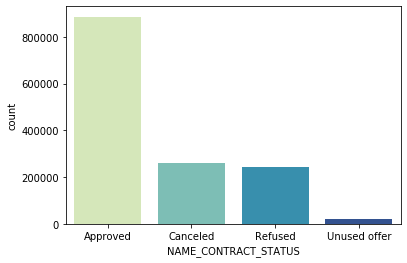

In [50]:
# Plotting the column to understand better 
sns.countplot(master_df['NAME_CONTRACT_STATUS'], palette='YlGnBu')
plt.show()

    Most of the applicants have their previous application status approved and some are refused. Since we are interested only in Approved and Refused status, we can removed canceled and Refused status

In [51]:
# only considering the status 'Aprroved' or 'Refused', since it is purely dependent on bank
master_df = master_df.loc[(master_df['NAME_CONTRACT_STATUS']=='Approved')|( master_df['NAME_CONTRACT_STATUS']=='Refused')]

In [52]:
# Considering only some columns, since the number of columns are large after merging
prev_col_list = ['SK_ID_CURR','SK_ID_PREV','NAME_CONTRACT_TYPE_y','AMT_ANNUITY_y','AMT_CREDIT_y','AMT_GOODS_PRICE_y',
                'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','DAYS_DECISION','NAME_CLIENT_TYPE','NAME_PRODUCT_TYPE']
prev_masterdf = master_df.loc[:,prev_col_list]
prev_masterdf.head(5)

,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PRODUCT_TYPE
0,100002,1038818.00,Consumer loans,9251.77,179055.00,179055.00,XAP,Approved,XNA,XAP,-606.00,New,XNA
1,100003,1810518.00,Cash loans,98356.99,1035882.00,900000.00,XNA,Approved,XNA,XAP,-746.00,Repeater,x-sell
2,100003,2636178.00,Consumer loans,64567.67,348637.50,337500.00,XAP,Approved,Cash through the bank,XAP,-828.00,Refreshed,XNA
3,100003,2396755.00,Consumer loans,6737.31,68053.50,68809.50,XAP,Approved,Cash through the bank,XAP,-2341.00,Refreshed,XNA
4,100004,1564014.00,Consumer loans,5357.25,20106.00,24282.00,XAP,Approved,Cash through the bank,XAP,-815.00,New,XNA


In [53]:
#### Datatype Checking
prev_masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131489 entries, 0 to 1430154
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1131489 non-null  int64  
 1   SK_ID_PREV              1131489 non-null  float64
 2   NAME_CONTRACT_TYPE_y    1131489 non-null  object 
 3   AMT_ANNUITY_y           1096940 non-null  float64
 4   AMT_CREDIT_y            1131488 non-null  float64
 5   AMT_GOODS_PRICE_y       1062445 non-null  float64
 6   NAME_CASH_LOAN_PURPOSE  1131489 non-null  object 
 7   NAME_CONTRACT_STATUS    1131489 non-null  object 
 8   NAME_PAYMENT_TYPE       1131489 non-null  object 
 9   CODE_REJECT_REASON      1131489 non-null  object 
 10  DAYS_DECISION           1131489 non-null  float64
 11  NAME_CLIENT_TYPE        1131489 non-null  object 
 12  NAME_PRODUCT_TYPE       1131489 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 120.9+ M

    All the columns are in the required datatype except DAYS_DECISION

In [54]:
# Converting DAYS_DECISION to its absolute value
prev_masterdf['DAYS_DECISION']= abs(prev_masterdf['DAYS_DECISION'])

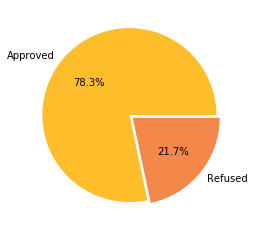

In [55]:
status = prev_masterdf.groupby(['NAME_CONTRACT_STATUS'])['SK_ID_CURR'].count().reset_index()
col = sns.color_palette('plasma_r')
plt.pie(status['SK_ID_CURR'], labels=status['NAME_CONTRACT_STATUS'], explode=(0,0.05), autopct='%.1f%%', colors=col)
plt.show()

    pie chart shows about 78% of application was approved

In [56]:
approved_df=prev_masterdf.loc[prev_masterdf["NAME_CONTRACT_STATUS"]=='Approved']
refused_df=prev_masterdf.loc[prev_masterdf["NAME_CONTRACT_STATUS"]=='Refused']

### 4. Univariate Analysis - Categorical

In [57]:
# Check the categorical columns - 
cat_cols = list(prev_masterdf.select_dtypes(include=['object']))
cat_cols.remove('NAME_CONTRACT_STATUS')
cat_cols

['NAME_CONTRACT_TYPE_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_PRODUCT_TYPE']

    Among the list, we are considering columns NAME_CONTRACT_TYPE_y, NAME_PAYMENT_TYPE, NAME_CLIENT_TYPE, NAME_PRODUCT_TYPE for analysis with respect to contract status approved/refused

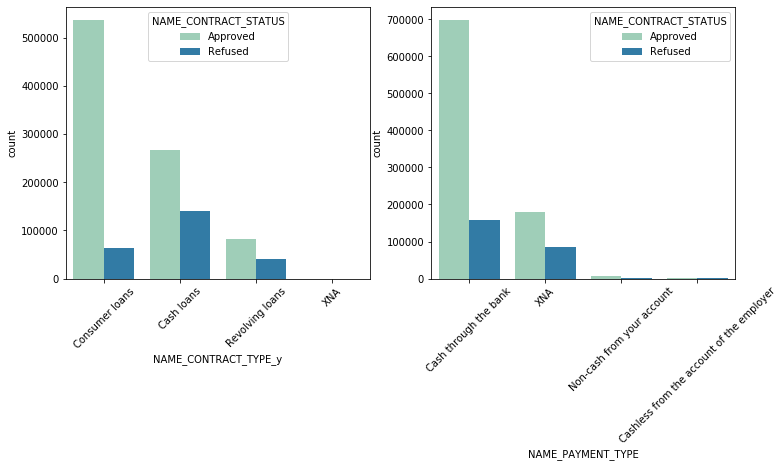

In [58]:
# Plotting 'NAME_CONTRACT_TYPE_y' 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=prev_masterdf['NAME_CONTRACT_TYPE_y'], hue= 'NAME_CONTRACT_STATUS', data=prev_masterdf,order=prev_masterdf['NAME_CONTRACT_TYPE_y'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
# Plotting 'NAME_PAYMENT_TYPE'
plt.subplot(1,2,2)
sns.countplot(x=prev_masterdf['NAME_PAYMENT_TYPE'], hue= 'NAME_CONTRACT_STATUS', data=prev_masterdf,order=prev_masterdf['NAME_PAYMENT_TYPE'].value_counts(ascending=False).index,palette='YlGnBu')
plt.xticks(rotation=45)
plt.show()

**Observation :**  

**NAME_CONTRACT_TYPE_y :**  

        Rejection or refusal is more with the applicants who chose cash loans. Consumer loans have the most highest approval count. 
**NAME_PAYMENT_TYPE :**  

    Cash through the bank payment type holders has significant no of rejections.

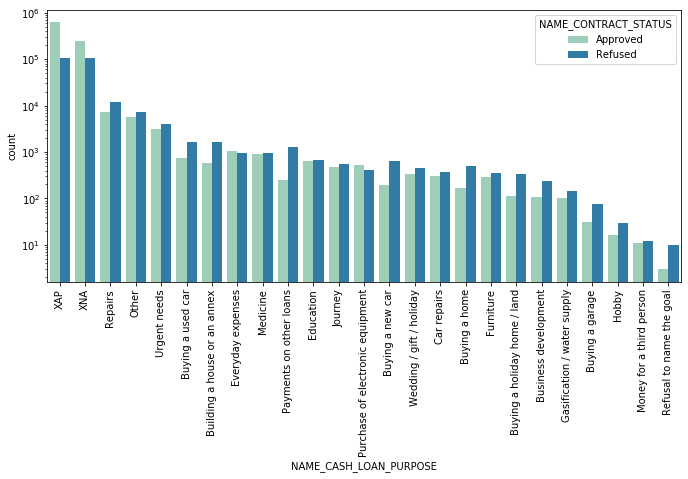

In [59]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.countplot(x=prev_masterdf['NAME_CASH_LOAN_PURPOSE'], hue= 'NAME_CONTRACT_STATUS', data=prev_masterdf,order=prev_masterdf['NAME_CASH_LOAN_PURPOSE'].value_counts(ascending=False).index,palette='YlGnBu')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

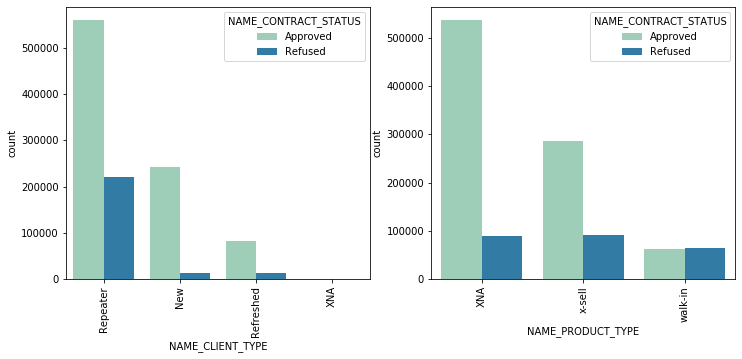

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=prev_masterdf['NAME_CLIENT_TYPE'], hue= 'NAME_CONTRACT_STATUS', data=prev_masterdf,order=prev_masterdf['NAME_CLIENT_TYPE'].value_counts(ascending=False).index,palette='YlGnBu')

plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x=prev_masterdf['NAME_PRODUCT_TYPE'], hue= 'NAME_CONTRACT_STATUS', data=prev_masterdf,order=prev_masterdf['NAME_PRODUCT_TYPE'].value_counts(ascending=False).index,palette='YlGnBu')

plt.xticks(rotation=90)
plt.show()

**Observation :**  

**NAME_CLIENT_TYPE :**  

        Rejection or refusal is more with the applicants who are Repeaters. New and Refreshed clients tend to see less refusal
**NAME_PRODUCT_TYPE :**  

    Product type such as 'x-sell' has refused more. Most of the previous applicants who got the loan approved has no product type entered

### 5. Finding Correlation

In [61]:
# Check the categorical columns - 
con_cols = list(prev_masterdf.select_dtypes(include=['int64', 'float64']))
con_cols.remove('SK_ID_CURR')
con_cols.remove('SK_ID_PREV')
con_cols

['AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'DAYS_DECISION']

In [62]:
# Find 10 most correlated columns for Approved
approved_corr = udf_corr_matrix(approved_df, con_cols)
approved_corr

,VAR1,VAR2,Correlation
0,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
1,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.83
2,AMT_CREDIT_y,AMT_ANNUITY_y,0.83
3,DAYS_DECISION,AMT_CREDIT_y,0.27
4,DAYS_DECISION,AMT_ANNUITY_y,0.26
5,DAYS_DECISION,AMT_GOODS_PRICE_y,0.26


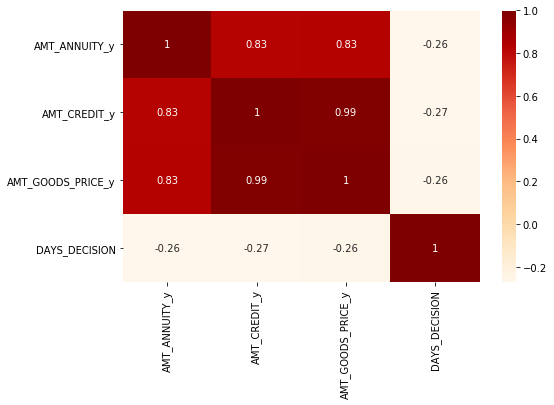

In [63]:
# Heat Map representation of Approved
appr_corr = approved_df[con_cols].corr()
plt.figure(figsize=(8,5))
sns.heatmap(appr_corr,cmap ='OrRd',annot=True)
plt.show()

In [64]:
# Find 10 most correlated columns for Refused
refused_corr = udf_corr_matrix(refused_df, con_cols)
refused_corr

,VAR1,VAR2,Correlation
0,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
1,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.83
2,AMT_CREDIT_y,AMT_ANNUITY_y,0.82
3,DAYS_DECISION,AMT_GOODS_PRICE_y,0.34
4,DAYS_DECISION,AMT_ANNUITY_y,0.29
5,DAYS_DECISION,AMT_CREDIT_y,0.27


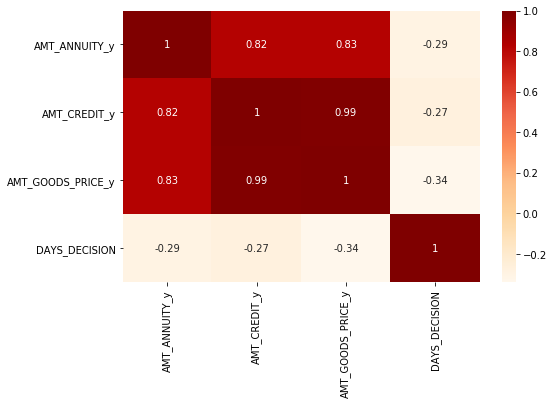

In [65]:
# Heat Map representation of refused
refs_corr = refused_df[con_cols].corr()
plt.figure(figsize=(8,5))
sns.heatmap(refs_corr,cmap ='OrRd',annot=True)
plt.show()

**Variables with higher Correlation for Approved and Refused :**

All variables are same for Approved and Refused with higher correlation. They are as follows :  
    `AMT_GOODS_PRICE_y	   -            AMT_CREDIT_y  `  
    `AMT_GOODS_PRICE_y	   -            AMT_ANNUITY_y `   
    `AMT_CREDIT_y	        -            AMT_ANNUITY_y  `  
    `DAYS_DECISION	       -            AMT_GOODS_PRICE_y  `  
    `DAYS_DECISION	       -            AMT_ANNUITY_y `   
    `DAYS_DECISION	       -            AMT_CREDIT_y  `  


### 6. Bivariate Analysis - Categorical vs Continuos

#### CASH_LOAN_PURPOSE vs DAYS_DECISION

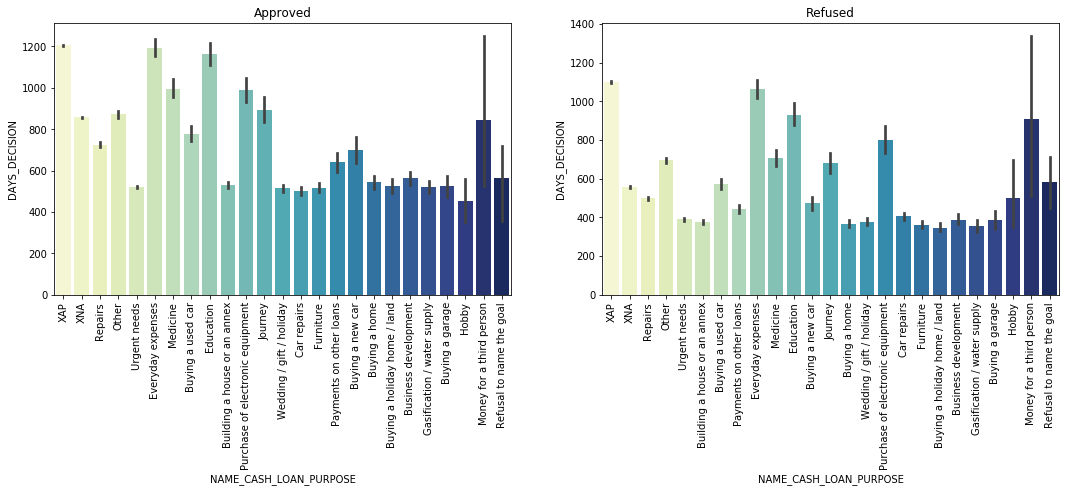

In [66]:
#categorical- numerical analysis
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(x="NAME_CASH_LOAN_PURPOSE",y="DAYS_DECISION",data=approved_df,order=approved_df['NAME_CASH_LOAN_PURPOSE'].value_counts(ascending=False).index,palette='YlGnBu')
plt.title("Approved")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x="NAME_CASH_LOAN_PURPOSE",y="DAYS_DECISION",data=refused_df,order=refused_df['NAME_CASH_LOAN_PURPOSE'].value_counts(ascending=False).index,palette='YlGnBu')
plt.title("Refused")
plt.xticks(rotation=90)
plt.show()

**Observation :**

    Here, we can observe that applications that had loans with urgent needs,buying a holiday home,furniture, etc were rejected withing a shorter duration whereas purposes such as for education and everyday expenses were rejected after a longer period of time. Since a lot of time needs to be done to verify other details supporting the purpose for the loan.

#### CLIENT_TYPE vs DAYS_DECISION

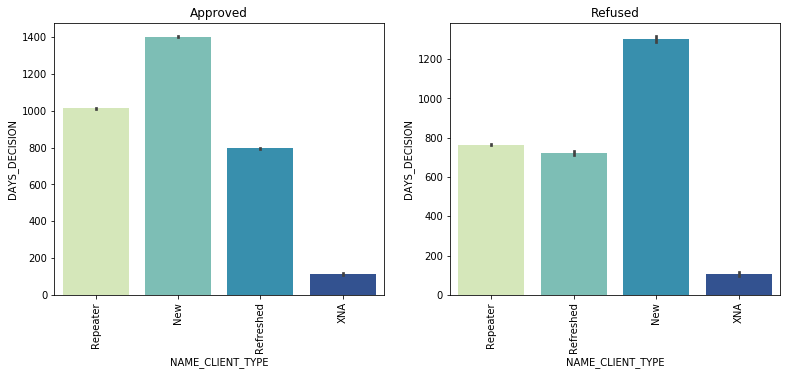

In [67]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(x="NAME_CLIENT_TYPE",y="DAYS_DECISION",data=approved_df,order=approved_df['NAME_CLIENT_TYPE'].value_counts(ascending=False).index,palette='YlGnBu')
plt.title("Approved")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x="NAME_CLIENT_TYPE",y="DAYS_DECISION",data=refused_df,order=refused_df['NAME_CLIENT_TYPE'].value_counts(ascending=False).index,palette='YlGnBu')
plt.title("Refused")
plt.xticks(rotation=90)
plt.show()

**Observations :** 

    Here we can see that a large number of applications were rejected within a short duration for clients who were of repeater or refreshed types. This could be since the details of the clients were already available and a background check would have been done earlier. Whereas new applciants took a longer time before a decision was made since, a lot more time would go into processing the details of the clients and doing background checks.

### 6.1 Bivariate - Categorical vs categorical

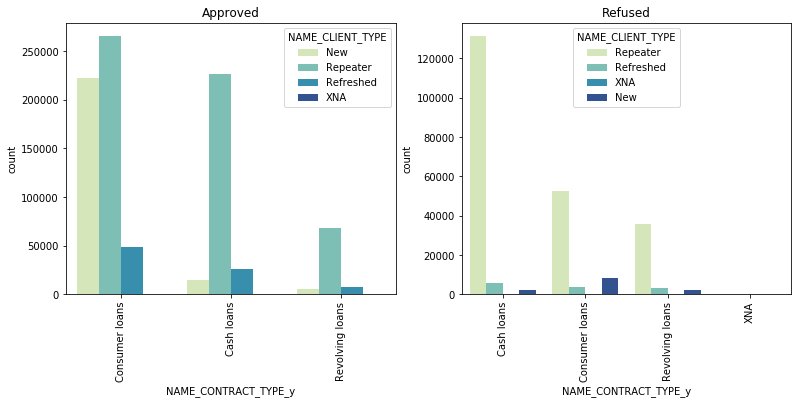

In [68]:
# Considering count plot, since we are trying to analyse both the variables as categorical
# Approved status
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(x="NAME_CONTRACT_TYPE_y",hue="NAME_CLIENT_TYPE",data=approved_df,palette='YlGnBu')
plt.title("Approved")
plt.xticks(rotation=90)
# Rejected Status
plt.subplot(1,2,2)
sns.countplot(x="NAME_CONTRACT_TYPE_y",hue="NAME_CLIENT_TYPE",data=refused_df,palette='YlGnBu')
plt.title("Refused")
plt.xticks(rotation=90)
plt.show()

**Observations :**
    
    Most of the repeater applicants who opted for consumer loans are approved, whereas new applicant with revolving loans have the less number of approval.Repeated applicants opting for Cash loans have the highest rate of refusal 

### Final Inferences 

  
    From the above analysis , we can observe that :
        1. Rejection or refusal is more with the applicants who chose cash loans. Consumer loans have the most highest approval count. 
        2. Applications rejected within a short duration for clients who were of repeater or refreshed types
        3. Applications that had loans with the purpose such as urgent needs,buying a holiday home,furniture, etc were rejected withing a shorter duration
        4. Those clients who gets the loan for repair purposes, are in a hugher number of defaulting the payment .

    Thus the variables that needs to be considered are:

    NAME_CONTRACT_TYPE
    AMT_CREDIT
    NAME_CASH_LOAN_PURPOSE